# 1 - ParagonCorp Products Sales Forecasting

## Data description `sample_dataset_timeseries_noarea.csv`

* Field Description: <br>

Feature | Description
---|---
`week_number`| contained information about week of specific product sold, (2021-52 to 2023-14)
`week_start_date`| contained information about week start date of specific product sold
`week_end_date`| contained information about week end date of specific product sold
`product_item`| contained information about product item/product code (Variabel Bebas)
`quantity`| contained information about quantity of product in respective week

Dataset source: `ParagonCorp`.

## Objective

Tujuan dari project ini adalah untuk membangun model peramalan *(forecasting)* yang dapat memprediksi kuantitas penjualan pada periode berikutnya. Untuk membuat model peramalan ini, Saya akan menggunakan data penjualan historis dari dataset `ParagonCorp` yang telah disediakan untuk mengidentifikasi pola dan trend penjualan produk, serta membuat prediksi berdasarkan pola tersebut. Tentunya, ini akan membantu bisnis untuk merencanakan *inventory* dan *staffing levels* agar lebih efektif dan dapat memastikan bahwa mereka siap menghadapi perubahan permintaan. Untuk mencapai tujuan ini, langkah-langkah yang dilakukan adalah sebagai berikut:<br>
1. Kumpulkan data penjualan historis.<br>
Dalam project ini, Saya akan menggunakan data penjualan historis dari periode `2021-52` sampai `2023-14` yang dapat digunakan untuk melatih model peramalan.<br>
2. Explore data.<br>
Saya akan menganalisis data untuk mengidentifikasi trend atau pola apa pun yang mungkin berguna dalam memprediksi penjualan di masa mendatang. Hal ini dapat mencakup `trend`, `seasonality` dan `noise` dari waktu ke waktu.<br>
3. Pilih model peramalan.<br>
Saya akan memilih model peramalan yang sesuai berdasarkan karakteristik data dan sifat proses penjualan.<br>
4. Training model.<br>
Saya akan menggunakan data historis untuk melatih model peramalan, dengan menyesuaikan parameter model seperlunya untuk mengoptimalkan performa.<br>
5. Evaluasi model.<br>
Saya akan menggunakan kumpulan data untuk mengevaluasi kinerja model dan melakukan penyesuaian yang diperlukan.<br>
6. Prediksi penjualan.<br>
Saya akan menggunakan model yang sudah di training untuk memperkirakan penjualan selama 1 periode ke depan.

# 2 - Introduction

- Nama: Alda Nesti Talenta Pakpahan <br>
- Batch: FTDS-018-RMT<br>

Hello, Judges. Perkenalkan, Saya Alda Nesti Talenta Pakpahan, biasa dipanggil Alda. Sebagai seseorang yang memiliki background Teknik Industri, kemudian tertarik dan antusias dengan hal yang terkait data, Saya berharap dapat mengkombinasikan ilmu serta keahlian teknis dan keterampilan analitis untuk memanfaatkan data yang pada akhirnya dapat menciptakan solusi untuk mengatasi setiap tantangan yang muncul.

# 3 - External Link

- Looker (Dashboard):<br>
Klik [link berikut](https://lookerstudio.google.com/reporting/63320502-7a32-4d55-a4ab-45f1322ca0be)
- Slide presentation:<br>
Klik [link berikut](https://docs.google.com/presentation/d/1djPPuDBhbLYJo2-KKNrpKVfKT2TUMSA04JyM_WwZ3Ns/edit?usp=sharing)

# 4 - Working Area

## 4-1 Import Libraries

Library adalah package python yang digunakan untuk membantu mempersingkat proses. Library ini nantinya akan Saya gunakan untuk kebutuhan *data loading*, *data cleaning*, *EDA*, *data manipulation*, *model training* dan *model evaluation*.

In [ ]:
## REQUIRED LIBRARIES

# For data wrangling
import numpy as np  # linear algebra
import pandas as pd  # data processing

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

# For model Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# For model evaluation
from sklearn.metrics import mean_absolute_error

# For save the files of model
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 4-2 Data Loading

Proses Data Loading yang dilakukan adalah:
- Mengakses file dataset
- Menampilkan 5 data pertama dan 5 data terakhir dari dataset
- Menduplikat dataset
- Mengecek ukuran dataset
- Melihat informasi yang ada dalam dataset, seperti:
  1. Variabel apa saja yang ada di dataset
  2. Tipe data dari setiap variabel
  3. Jumlah *missing value* dari setiap variabel
  4. Apakah ada data yang duplikat dalam dataset
- Mengecek `unique value` yang ada pada variabel `product_item`

Saya menggunakan `.read_csv()` untuk menampilkan dataset ini dan menyimpannya dalam dataFrame. Kemudian Saya ingin melihat 5 baris pertama dengan `.head()`.

In [ ]:
# Load the data and check out first 5 data
df = pd.read_csv('/content/sample_dataset_timeseries_noarea.csv')
df.head()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


Selanjutnya, Saya ingin melihat 5 baris terakhir dengan `.tail()`:

In [ ]:
# Check out last 5 data
df.tail()

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


Setelah mengakses file datanya, Saya akan menduplikat datanya sebelum dilakukan proses *preprocessing data* dengan `.copy()`.Tujuannya adalah jika dipertengahan pengerjaan projek ini Saya ingin melihat dataset originalnya, Saya akan lebih mudah untuk mengaksesnya dengan memanggil variabel `df`.

In [ ]:
# Duplicate dataset
df1 = df.copy()

Sekarang Saya ingin mengecek ukuran dataset dengan `len()` dan `.shape`:

In [ ]:
# Check total data
len (df1)

102733

In [ ]:
# Check shape dataset
df1.shape

(102733, 5)

In [ ]:
# Alternatif way to check total data by shape
tot_data = df1.shape[0]
tot_data

102733

Dari informasi di atas, kita dapat mengetahui bahwa ada 102.733 baris dan 5 kolom dalam dataFrame ini.

Selanjutnya, Saya akan mengecek ada variabel apa saja dan tipe data didalamnya dan apakah terdapat missing value dari setiap kolom yang ada didalam dataFrame tersebut dengan `.info()` dan `.isnull()`:

In [ ]:
# Show basic info of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [ ]:
# Finding the total number of missing value for each column
df1.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

Dari hasilnya, kita dapat melihat daftar semua kolom, jumlah value non-null dan tipe data dari setiap kolom. Sekarang, Saya akan jabarkan informasi apa saja yang bisa kita dapatkan dari sini:<br>
1. Ada 5 kolom yang terdapat pada dataFrame ini yaitu `week_number`, `week_start_date`, `week_end_date`, `product_item`, `quantity`.<br>
2. Seperti yang kita lihat bahwa ada tipe data `int64`, dan `object` dalam dataset ini.<br>
Apakah ada tipe data yang ganjil? Coba kita lihat setiap tipe data pada masing-masing kolom. Saya menemukan ada tipe data yang ganjil pada kolom `'week_start_date', 'week_end_date'`. Seharusnya tipe datanya `datetime`.<br>
3. Selanjutnya fokuskan pada jumlah value Non-Null pada setiap kolom. Apakah ada missing value? <br>
Kita menemukan ada data yang missing value dalam dataFrame, yaitu pada variabel `product_item` sebanyak 2 data.

Disini, Saya ingin melakukan konversi tipe data terlebih dahulu untuk kolom `'week_start_date', 'week_end_date'` ke tipe data `datetime`.

In [ ]:
# convert `object` data type to datetime in column 'week_start_date' and 'week_end_date'
df1['week_start_date'] = pd.to_datetime(df1['week_start_date'].str.strip(), format='%Y-%m-%d')
df1['week_end_date'] = pd.to_datetime(df1['week_end_date'].str.strip(), format='%Y-%m-%d')

Kemudian, Saya ingin melakukan drop rows missing value. Karena kasus forecasting ini harus menggunakan data historis dari permintaan produk yang tidak ada missing value.

In [ ]:
# drop null values in 'product_item'
df1.dropna(axis=0,inplace=True)

In [ ]:
# Check shape dataset
df1.shape

(102731, 5)

Dari informasi di atas, kita dapat mengetahui bahwa shape data sekarang menjadi 102.731 baris dan 5 kolom dalam dataFrame ini.

Selanjutnya, Saya ingin mengecek apakah ada data duplikat dalam dataFrame dengan `.duplicated()`:

In [ ]:
# Check for duplicate data 
df1.duplicated().sum()

0

Berdasarkan informasi di atas menunjukkan bahwa tidak ada data yang duplikat di dataset.

Sekarang, Saya ingin mengecek `unique value` yang ada pada variabel `product_item` agar Saya dapat mengetahui ada berapa dan apa saja jenis product_item yang dijual .

In [ ]:
# Get number of unique value of 'product_item' variable
df1['product_item'].nunique()

2309

In [ ]:
# Get unique value of 'product_item' variable
unique_prod_item = df1['product_item'].unique()
df_1 = pd.DataFrame(unique_prod_item)
df_1

,0
0,0073377087c7ddace313ff829cd7b0b3
1,012d2bb142b2d5e57330acbfd8e9ac52
2,0192926e33d1153b63511a5b83eca843
3,019502f6d13e383caa9b9673bf1302f8
4,01e7ca6d4e21badc1d4225b6b2c7bd9e
...,...
2304,2961fdb5e2a1907c5154bbcae58a437b
2305,4c54acbf5c6b3612381feb3b5bc6dca4
2306,b86ac140782a3ec0662fc3a2b7c30590
2307,c26bb0ce75e31e6c29aae7056c8bbce6


Disini terlihat bahwa ada 2.309 product_item yang dijual.

## 4-3 Exploratory Data Analysis (EDA)

Proses EDA yang dilakukan adalah:
- Membuat series untuk dataset
- Descriptive Analysis
- Series Decomposition
- Stationery Test

### Membuat series untuk dataset

In [ ]:
# grouping the columns 'week_end_date' and then aggregating them with the 'quantity' column by using .sum()
df2 = df1.groupby(['week_end_date'])['quantity'].sum().reset_index()

df2 = pd.DataFrame(df2)
df2

,week_end_date,quantity
0,2022-01-02,128808
1,2022-01-09,3839557
2,2022-01-16,4138934
3,2022-01-23,4149077
4,2022-01-30,4824273
...,...,...
62,2023-03-12,4775638
63,2023-03-19,4787111
64,2023-03-26,4757590
65,2023-04-02,6001166


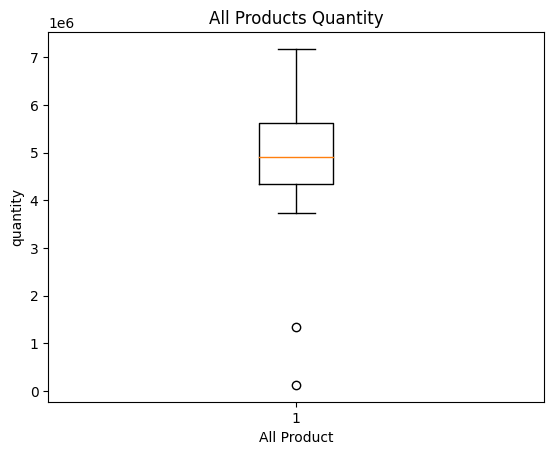

In [ ]:
# create a boxplot of the quantity data in df2
plt.boxplot(df2['quantity'])

# add labels and title
plt.xlabel('All Product')
plt.ylabel('quantity')
plt.title('All Products Quantity')

# show the plot
plt.show()

Terlihat bahwa data penjualan semua produk memiliki beberapa outlier. Ini yang akan membuat adanya spike di dalam grafik line nantinya. Outlier ini mungkin menyulitkan model untuk memperkirakan penjualan kedepannya. Jadi, outlier ini akan dihandling nanti pada bagian preprocessing.

In [ ]:
df2.describe()

,quantity
count,6.700000e+01
mean,4.893709e+06
std,1.044440e+06
min,1.288080e+05
25%,4.337716e+06
50%,4.907074e+06
75%,5.619344e+06
max,7.172144e+06


In [ ]:
# create time series data
df2 = df2.set_index('week_end_date')
df2_data = df2['quantity']

In [ ]:
# show data
df2_data

week_end_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

### Descriptive Analysis

Pada tahap ini, Saya ingin mencari insigth yang dapat diperoleh berdasarkan informasi dari data series yang telah di buat.

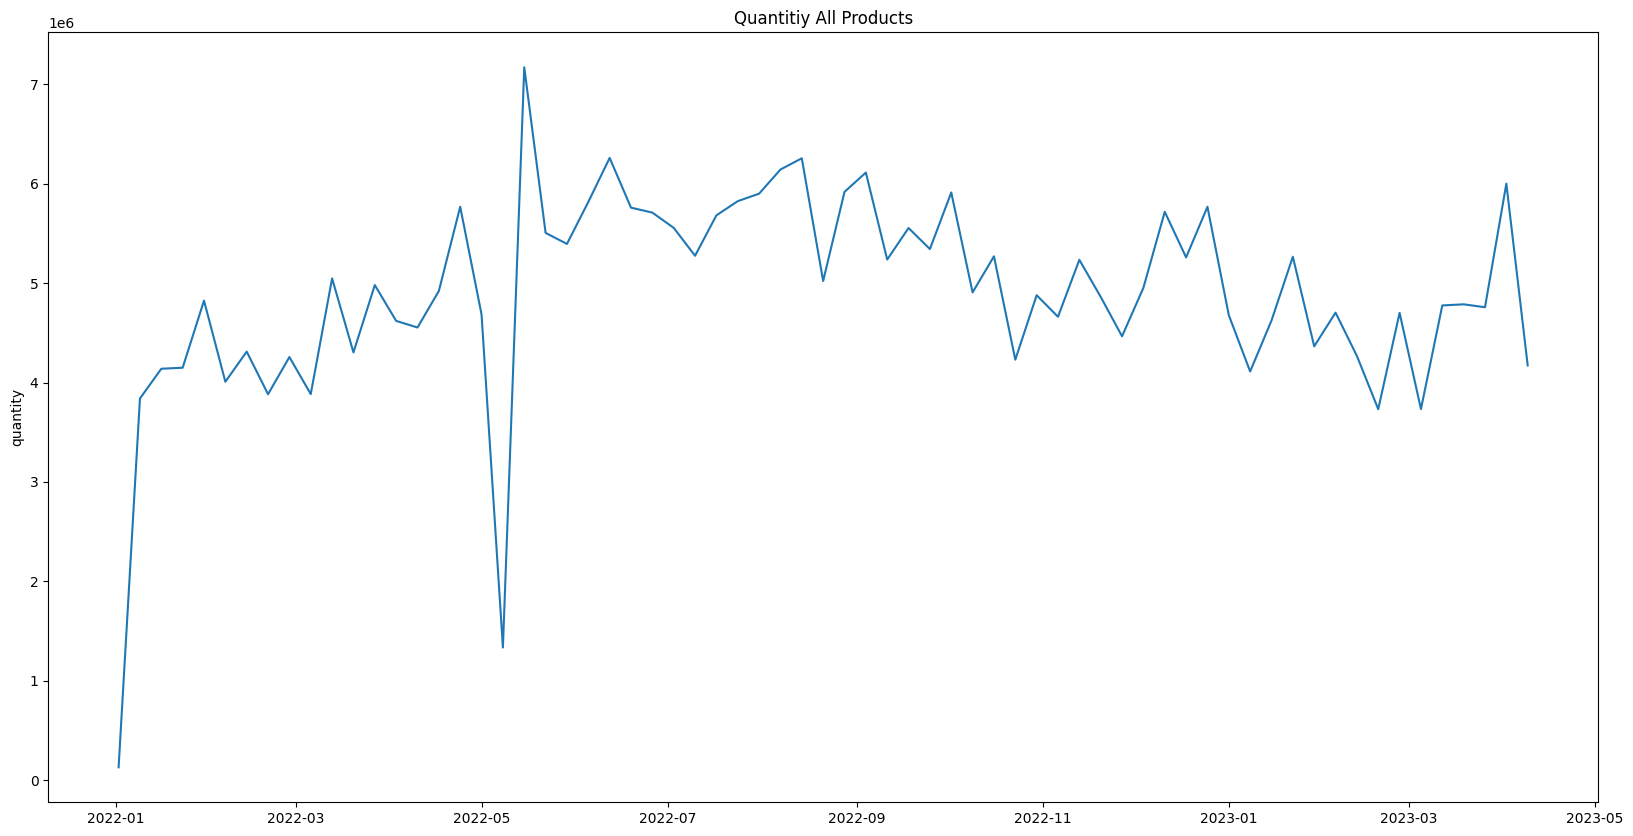

In [ ]:
# descriptive analysis
plt.figure(figsize=[20,10])
sns.lineplot(data=df2_data)      # lineplot with seaborn
plt.title(f'Quantitiy All Products')     # set title
plt.xlabel('')
plt.show()

Dari hasil visualisasi linechart diatas, diperoleh informasi sebagai berikut:<br>
- Terlihat data ini `terdapat variasi trend dan seasonality yang mengalami kenaikan dan penurunan yang signifikan dari waktu ke waktu`. Namun, rata-rata quantitynya monoton dari 4jt-6jt. Sehingga data ini terlihat `stasioner`.

### Series Decomposition

Untuk memperoleh informasi lebih lanjut, Saya akan melakukan `dekomposisi` pada data dengan menggunakan library `statsmodels`.

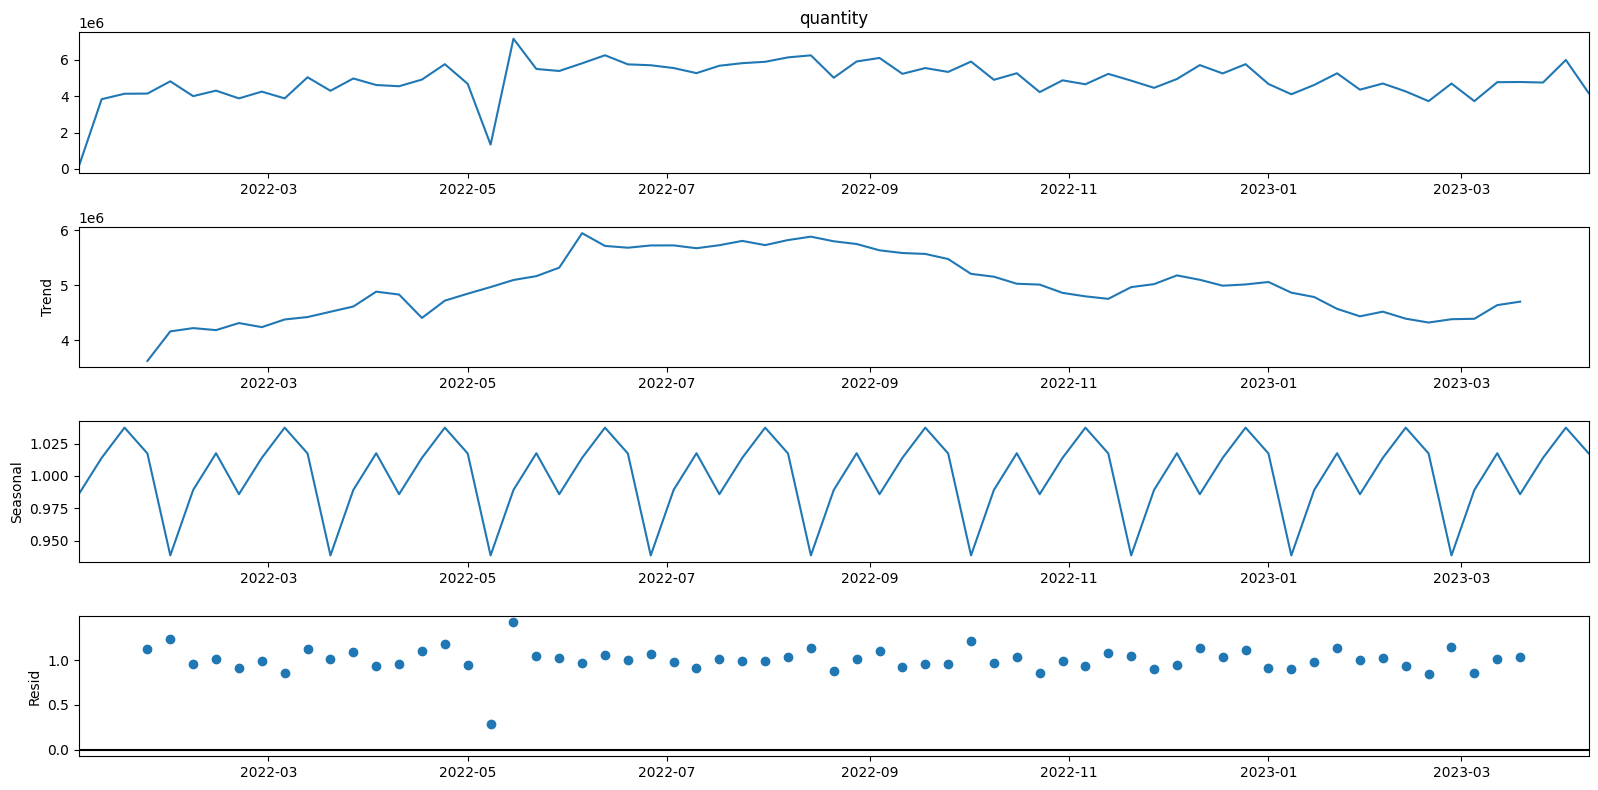

In [ ]:
# dataset decomposition
decomposed = seasonal_decompose(df2_data, model='multiplicatif', period=7) # trend dan seasonal multiplicatif
fig = decomposed.plot()     # plot hasil dekomposisi
fig.set_size_inches((16, 8))    # atur ukuran visualisasi
fig.tight_layout()
plt.show()

Dari hasil plot diatas, lebih terlihat jelas bahwa terdapat trend dan seasonalitas pada dataset:<br>
- Trend dari waktu ke waktu fluktuatif pada range quantity `4jt-6jt`.
- Terdapat season pada dataset dengan range sekitar `7 minggu-8 minggu`.
- Noisenya sedikit, datanya tidak begitu bervariasi.

### Stationery Test

Selanjutnya adalah melakukan pengecekan stasionaritas dataset dengan `Augmented Dickey Fuller (adfuller)` dari library `statsmodel`.

In [ ]:
# stationary function definition
def check_stationarity(series):
    
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# check stationarity
check_stationarity(df2_data)

ADF Statistic: -3.328821
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


Dari informasi di atas dibuktikan bahwa data bersifat `stasioner`.

## 4-4 Data Pre-Processing

### Split Train Test

Setelah memperoleh informasi pada proses EDA, selanjutnya Saya akan mempersiapkan `data train` dan `data test` yang akan di pakai pada model training dan model evaluasi.

In [ ]:
# splitting train and test dataset
X_train=df2[:60] 
X_test=df2[60:]

print(f"Train size : {X_train.shape}")
print(f"Test size : {X_test.shape}")

Train size : (60, 1)
Test size : (7, 1)


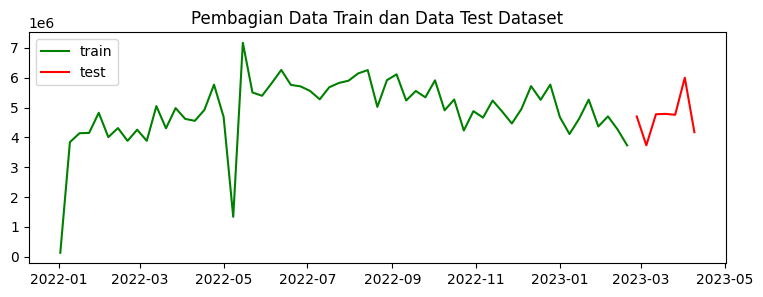

In [ ]:
# distribution plot of data train and data test
plt.figure(figsize=[9,3])
plt.plot(X_train, 'g-', label='train')  # data train
plt.plot(X_test, 'r-', label='test')    # data test
plt.title('Pembagian Data Train dan Data Test Dataset')
plt.legend()
plt.show()

### Handling Outliers

Pada bagian ini, Saya akan mengolah data yang telah Saya eksplorasi sebelum masuk ke bagian modeling. Sebelumnya Saya melihat bahwa dalam data penjualan ada outlier yang besar. Namun, kejadian ini tidak memiliki pola kejadian apapun. Jadi, outlier ini akan ditangani dengan memanipulasi nilai quantity.<br>

Sebelum Saya memanipulasi penjualan produk, Saya akan mencari nilai yang cocok untuk metode manipulasi. Saya akan menghitung skewness terlebih dahulu untuk melihat apakah datanya skewed atau tidak.

In [ ]:
# checking skewness
X_train.quantity.skew().round(2)

-1.89

Karena datanya sangat miring ke kiri *(left-skewed)*, Saya akan memanipulasi data penjualan pada kejadian outlier dengan mengganti nilainya dengan median data penjualan.

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Looking for outliers in variable 'quantity', using the interquantile proximity rule IQR * 1.5

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'quantity', 1.5)
print('Nilai Batas Atas quantity     : ', upper_boundary)
print('Nilai Batas Bawah quantity    : ', lower_boundary)

Nilai Batas Atas quantity     :  7696243.875
Nilai Batas Bawah quantity    :  2343962.875


In [ ]:
# Lets look at the number and percentage of outliers for `quantity`

print('Total perjalanan : {}'.format(len(X_train)))
print('quantity yang lebih besar dari 7696243.875 (right end outliers) : {}'.format(len(X_train[X_train['quantity'] > upper_boundary])))
print('quantity yang lebih kecil dari 2343962.875 (left end outliers)  : {}'.format(len(X_train[X_train['quantity'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(X_train[X_train['quantity'] > upper_boundary])/len(X_train) * 100))
print('% left end outliers  : {}'.format(len(X_train[X_train['quantity'] < lower_boundary]) / len(X_train) * 100))

Total perjalanan : 60
quantity yang lebih besar dari 7696243.875 (right end outliers) : 0
quantity yang lebih kecil dari 2343962.875 (left end outliers)  : 2

% right end outliers : 0.0
% left end outliers  : 3.3333333333333335


In [ ]:
# handling outlier with median
median = float(X_train["quantity"].median())
X_train["quantity"] = X_train["quantity"].mask(X_train["quantity"] < lower_boundary, median)

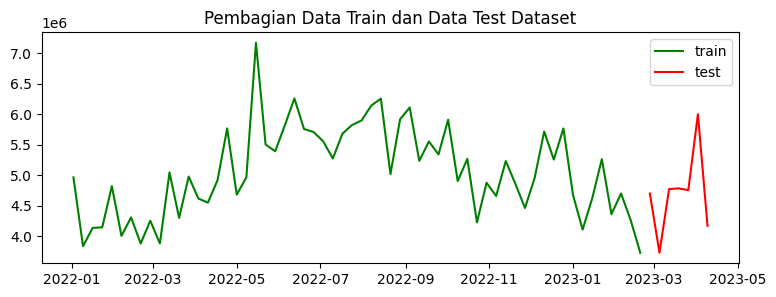

In [ ]:
# distribution plot of data train and data test
plt.figure(figsize=[9,3])
plt.plot(X_train, 'g-', label='train')  # data train
plt.plot(X_test, 'r-', label='test')    # data test
plt.title('Pembagian Data Train dan Data Test Dataset')
plt.legend()
plt.show()

Sekarang data penjualan produk tidak ada lonjakan *(spike)* yang besar.

## 4-5 Model Definition & Model Traning

Setelah data siap digunakan untuk modelling, selanjutnya adalah definisi model dan metrics untuk evaluasi.<br>

1. Model yang digunakan adalah `ARIMA` karena setelah di split train-set dan test-set, datanya menjadi non-stationer.<br>
2. Metrics yang digunakan adalah `MAE` karena MAE tidak sensitif terhadap outlier, jika dilihat pada poin EDA terdapat pola quantity yang naik dan turun secara tiba-tiba. Kemungkinan data tersebut akan dianggap sebagai outlier. Oleh karena itu saya menggunakan metrics MAE. Kemudian, Saya juga menggunakan metrics `AIC` untuk memilih parameter model `ARIMA` yang terbaik.

Sebelum membuat model, Saya akan definisikan fungsi untuk mencari model ARIMA yang optimal.

In [ ]:
def find_best_model(data,num_p,num_d,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pdq=[[],[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for d in range(num_d+1):
          for q in range(num_q+1):
            #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARIMA(data,order=(p,d,q))
                    result=model.fit()
                    pdq[0].append(p)
                    pdq[1].append(d)
                    pdq[2].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pdq[0]
    df['d']=pdq[1]
    df['q']=pdq[2]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.d.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [ ]:
# Check stationarity
check_stationarity(X_train)

ADF Statistic: -1.774396
p-value: 0.393245
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Non-stationary


Dari informasi diatas dapat disimpulkan bahwa *dataset* masih belum stationer. Oleh karena itu akan Saya coba stationer-kan dengan differensiasi.

In [ ]:
# Differensiasi dataset
check_stationarity(X_train.diff().dropna())

ADF Statistic: -7.381429
p-value: 0.000000
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Stationary


Dari informasi diatas dapat disimpulkan bahwa butuh 1x differensiasi agar dataset stationer.

Selanjutnya adalah plot acf dan pacf untuk menentukan order dari ARIMA.

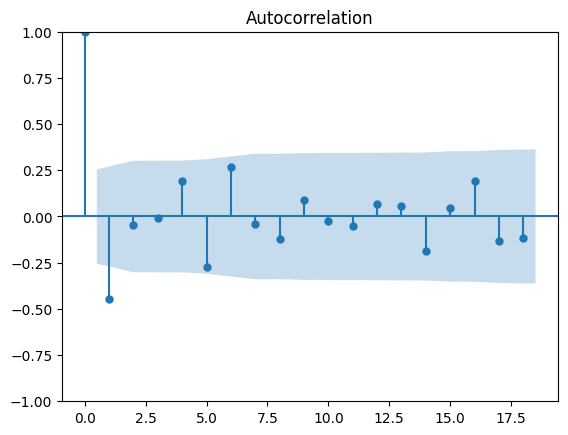

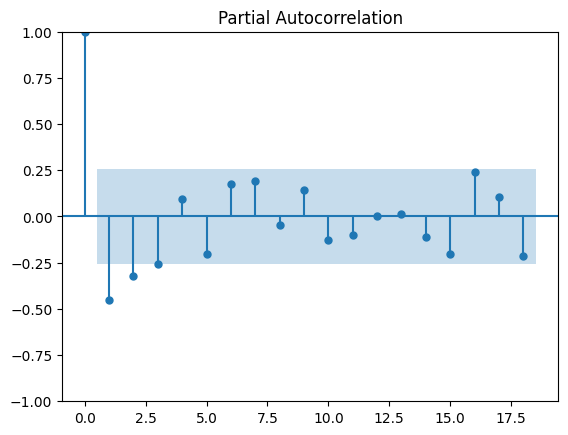

In [ ]:
# Plot ACF & PACF
plot_acf(X_train.diff().dropna())
plot_pacf(X_train.diff().dropna())
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa, kira-kira order yang dibutuhkan adalah:<br>
- AR: 2
- Differensiasi: 1
- MA: 1

Kemudian Saya coba validasi order yang dibutuhkan dengan fungsi yang telah dibuat.

In [ ]:
# find best model
find_best_model(X_train, 5,1,5)

(5,
 1,
 3,
 1738.6880924414495,
     p  d  q          AIC
 69  5  1  3  1738.688092
 7   0  1  1  1739.264550
 68  5  1  2  1739.773468
 43  3  1  1  1739.884413
 44  3  1  2  1740.017472
 .. .. .. ..          ...
 12  1  0  0  1775.221888
 3   0  0  3  1780.283925
 2   0  0  2  1781.897412
 1   0  0  1  1784.066312
 0   0  0  0  1980.808201
 
 [72 rows x 4 columns])

Dari informasi diatas dapat disimpulkan bahwa terdapat perubahan order. Sehingga order yang digunakan untuk training adalah:<br>
- AR: 5
- Differensiasi: 1
- MA: 3

In [ ]:
# Training Model
model_arima=ARIMA(X_train, order=(5,1,3))
model_arima_res = model_arima.fit()
print('The AIC is',model_arima_res.aic)

The AIC is 1738.6880924414495


## 4-6 Model Evaluation

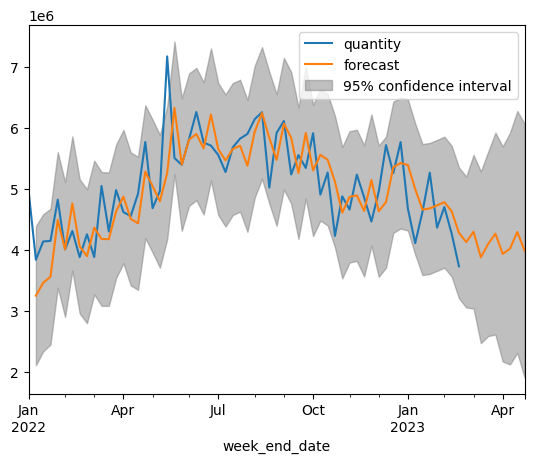

In [ ]:
# create plot of quantity vs forecast
fig, ax = plt.subplots()
ax = X_train.plot(ax=ax)
plot_predict(model_arima_res, 1, 68, ax=ax)
plt.show()

In [ ]:
# Predict 
y_pred = pd.Series(np.array(model_arima_res.forecast(11)),index=np.arange(1,12))
y_pred = pd.DataFrame(y_pred)
y_pred.columns=['quantity']

In [ ]:
# Split y_prediksi
y_pred_test = y_pred[:7]
y_pred_1month = y_pred[7:]

In [ ]:
# Create a dataframe to see the amount of production that is more and the number of predictions that are less
pred = pd.DataFrame({'actual': X_test['quantity'].values,
                'prediction' : y_pred_test['quantity'].values})
pred['indicator'] = np.where(pred['prediction'] > pred['actual'], 'higher', 'lower')
pred_group = pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
pred_group

,indicator,counts
1,lower,6
0,higher,1


In [ ]:
# Evaluate model by metrics
print('MAE test = ', mean_absolute_error(X_test, y_pred_test))

MAE test =  775750.0590189734


Dari informasi diatas dapat disimpulkan bahwa:<br>
- Model ini memiliki error sejumlah +- 775750. Contohnya jika hasil prediksi quantity adalah 4.129.320 maka ada kemungkinan quantity aktualnya 4.905.070 atau bisa juga 3.353.570. Error ini termasuk kecil dibandingkan range quantity produk berkisar jutaan. Namun, nilai outlier yang menunjukkan nilai quantity minimum sangat mengganggu performa model.
- Model cenderung memprediksi quantity lebih rendah dari nilai aktual.

## 4-7 Forecast Quantity in the next period

Berikut hasil forecast quantity pada 1 periode ke depan.

In [ ]:
# forecast for the next period
y_pred_1month

,quantity
8,4.295236e+06
9,3.988660e+06
10,3.961620e+06
11,4.274748e+06


## 4-8 Model Saving

Pada bagian ini, dilakukan proses penyimpanan model.

In [ ]:
# save model
with open('model_arima_res.pkl', 'wb') as file_1:
  pickle.dump(model_arima_res, file_1)

## 4-9 Model Inference (`notebook terpisah`)

Model inference akan dilakukan pada Notebook terpisah dengan judul `inferencing_ParagonCorp_ftds_rmt18_Alda_Nesti_Talenta_Pakpahan`.<br>

Hal ini dilakukan, agar dapat mem-validasi apakah model dapat berjalan dengan baik atau tidak dengan notebook yang clean dari variabel.

# 5 - Conclusion/Overall Analysis

**Secara keseluruhan** proses yang dilakukan pada project ini adalah:<br>
- Menentukan objective dari project
- Import semua library yang dibutuhkan
- Load dataset dan eksplorasi info dasar dari data
- Melakukan EDA untuk menemukan insight, seperti:<br>
	- Membuat series untuk dataset
	- Melakukan deskriptif analisis
	- Memecah dataset untuk mencari *trend* dan *seasonality* dengan *Series Decompostion*
	- Uji stasioner data dengan **adf test** <br>
- Data preprocessing dimana pada tahap ini melakukan beberapa hal seperti:<br>
	- Split dataset menjadi data train dan data test
	- Handling outliers <br>
- Model Definition dan Model Training
- Model Evaluation
- Melakukan forecasting untuk 1 periode kedepan
- Model Saving
- Model Inference
- Pengambilan kesimpulan

**Kesimpulan** dari project ini adalah:<br>
- Sebelum membuat model, Saya melakukan **eksplorasi sederhana** untuk mengenal dataset yang tersedia. Hasil eksplorasi adalah sebagai berikut:<br>
  1. Terdapat 68 minggu data quantity penjualan produk.<br>
  2. Terdapat dua data point yang memiliki total quantity penjualan terendah dibawah rata-rata.<br>
  3. Berdasarkan visualisasi line chart total quantity produk keseluruhan, menunjukkan bahwa data ini `terdapat variasi trend dan seasonality yang mengalami kenaikan dan penurunan yang signifikan dari waktu ke waktu`. Namun, rata-rata quantitynya monoton dari 4jt-6jt. Sehingga data ini terlihat `stasioner`.<br>
  4. Setelah dataset didekomposisi, terlihat jelas bahwa:<br>
     - Trend dari waktu ke waktu fluktuatif pada range quantity `4jt-6jt`.<br>
     - Terdapat season pada dataset dengan range sekitar `7 minggu-8 minggu`.<br>
     - Noisenya sedikit, datanya tidak begitu bervariasi.<br>
  5. Sebelum membuat model, Saya harus mengecek terlebih dahulu apakah datanya sudah stasioner? Secara keseluruhan, datanya sudah stasioner.<br>

- **Modeling**. Karena setelah data di split train-set dan test-set itu datanya menjadi non-stationer, sehingga Saya memilih menggunakan model `ARIMA`. Kemudian metrics yang digunakan adalah `MAE` karena MAE tidak sensitif terhadap outlier, jika dilihat pada poin EDA terdapat pola quantity yang naik dan turun secara tiba-tiba. Kemungkinan data tersebut akan dianggap sebagai outlier. Oleh karena itu saya menggunakan metrics MAE. Kemudian, Saya juga menggunakan metrics `AIC` untuk memilih parameter model `ARIMA` yang terbaik.<br>

- Berdasarkan hasil training model didapatkan bahwa:<br>
  1. Model yang terpilih sudah lumayan dapat menangkap trend dari dataset akan tetapi model ini masih belum dapat menangkap seasonality dengan baik.<br>
  2. Model ini memiliki `error sejumlah +- 775750`. Error ini termasuk kecil karena range total quantity produk berkisar jutaan. Model cenderung memprediksi quantity lebih rendah dari nilai aktual. 
  3. Performa model ini jika dikaitkan dengan domain business yang dihadapi adalah:<br>
    - Jika model cenderung memprediksi quantity lebih rendah dari nilai aktual, maka kemungkinan kita tidak dapat memenuhi permintaan pelanggan di waktu tertentu. Ini fatal ketika produk yang tidak terpenuhi itu merupakan item produk yang paling tinggi diminati oleh pelanggan, karena akan menimbulkan kekecewaan bagi pelanggan kita dan kemungkinan mereka akan mencari alternatif produk dari kompetitor.<br>
    - Sebaliknya jika model di suatu waktu tertentu memprediksi lebih tinggi dari nilai aktual, maka akan menimbulkan kerugian bagi perusahaan. Ini fatal ketika produk yang disimpan dalam quantity banyak merupakan item produk yang jarang diminati oleh pelanggan. Ini salah satunya bisa menyebabkan besarnya biaya penyimpanan (storage cost).<br>
  4. Dari hasil training model ini, diperoleh hasil forecast untuk nilai quantity periode berikutnya (4 minggu kedepan), masing-masingnya yaitu:<br>

date | forecast
---|---
2023-04-16 | 4.295236e+06
2023-04-23 | 3.988660e+06
2023-04-30 | 3.961620e+06
2023-05-07 | 4.274748e+06

<br>

- Objective yang diharapkan di awal belum bisa terpenuhi, karena model kita belum menghasilkan performa yang baik dan belum layak untuk di deployment, maka diperlukan ***further improvement plan*** seperti berikut:<br>
  1. Improvement Model.<br>
Untuk menciptakan model yang dapat menangkap trend dan seasonality dengan baik, sebaiknya item produk diklasifikasikan terlebih dahulu ke dalam 3 kategori yaitu kategori produk yang memiliki tingkat permintaan yang sangat tinggi (fast moving), kategori produk yang memiliki tingkat permintaan yang sedang (slow moving) dan kategori produk yang memiliki tingkat permintaan yang rendah (non moving/dead stock). Kemudian kita dapat membuat model dari masing-masing kategori produk tersebut. Karena jika digabung semua produk untuk semua model seperti yang Saya lakukan di sini, maka dikhawatirkan forecast-nya tidak merepresentasikan aktualnya. Hal ini disebabkan karena ada product item yang permintaannya sangat sedikit dalam suatu periode tertentu dan itu akan mengganggu performa model yang seharusnya bisa lebih baik jika dipisahkan di awal.<br>
  2. Business Insight.<br>
Dari segi bisnis, jika kita sudah mengetahui kategori produk yang memiliki prediksi permintaan yang tinggi, kita bisa lebih fokus untu memanagement ketersediaan raw material, memanagement *staffing levels* agar lebih efektif, merancang sistem *supply chain* yang efektif agar dapat memenuhi permintaan pelanggan.<br>
Kemudian jika kita sudah mengetahui permintaan produk yang sedang ke rendah, kita juga harus memanagement persediaannya agar tidak membebani banyak biaya karena penyimpanan stok di gudang dalam waktu yang lama.